In [2]:
import pandas as pd
import numpy as np

In [3]:
saferCar = pd.read_csv('../data/safercar_data.csv')

saferCar["ABS"].dropna()

filtered_df = saferCar[["MAKE", "MODEL", "MIN_GROSS_WEIGHT", "MAX_GROSS_WEIGHT", "CURB_WEIGHT", "BODY_FRAME", "VEHICLE_CLASS", "BODY_STYLE", "VEHICLE_TYPE"]] 

filtered_df.dropna()

/var/folders/ht/g3fy326d04d73l_rpsvbc0680000gn/T/ipykernel_30865/2341324547.py:1: DtypeWarning: Columns (22,36,39,42,43,52,55,58,61,72,73,75,115,123,126,127) have mixed types. Specify dtype option on import or set low_memory=False.
  saferCar = pd.read_csv('../data/safercar_data.csv')


,MAKE,MODEL,MIN_GROSS_WEIGHT,MAX_GROSS_WEIGHT,CURB_WEIGHT,BODY_FRAME,VEHICLE_CLASS,BODY_STYLE,VEHICLE_TYPE
2666,FORD,BRONCO,5540.0,6180.0,3414.0,Frame-Based,SUV,SUV,MPV
3666,HONDA,PILOT,5842.0,5842.0,4226.0,Uni-Body,SUV,SUV,MPV
3667,HONDA,PILOT,5545.0,5545.0,4226.0,Uni-Body,SUV,SUV,MPV
4135,ACURA,TLX,4762.0,4762.0,3749.0,Uni-Body,PASSENGER CAR,4 DR,PC
4136,ACURA,TLX,4497.0,4497.0,3749.0,Uni-Body,PASSENGER CAR,4 DR,PC
...,...,...,...,...,...,...,...,...,...
11726,TOYOTA,VENZA,4960.0,5270.0,4171.0,Uni-body,SUV,SUV,MPV
11727,TOYOTA,VENZA,4960.0,5270.0,4171.0,Uni-body,SUV,SUV,MPV
11738,VOLKSWAGEN,JETTA,4013.0,4256.0,2963.0,Uni-Body,PASSENGER CAR,4 DR,PC
11753,VOLVO,XC60,3997.0,5355.0,4180.0,Uni-Body,SUV,SUV,MPV


In [4]:
carPrices = pd.read_csv('../data/car_prices.csv')

carPrices["Manufacturer"] = carPrices["Manufacturer"].apply(lambda x: x.lower())

average_price_by_manufacturer = carPrices.groupby('Manufacturer')['Price'].mean()

In [5]:
df = pd.read_csv('../data/num_format.csv')

df['VEHICLE_BRAND'] = df['VEHICLE_BRAND'].apply(lambda x: str(x).lower())

brands = df["VEHICLE_BRAND"].unique()

average_price_by_manufacturer

Manufacturer
acura             5910.933333
alfa romeo        9890.250000
aston martin     54000.000000
audi             14106.545098
bentley         197574.500000
                    ...      
vaz               4613.583333
volkswagen       11640.421416
volvo            10278.894737
zaz               3822.500000
სხვა             17248.500000
Name: Price, Length: 65, dtype: float64

In [6]:
avgPricePerBrand = pd.DataFrame(columns=["Brand", "AvgPrice"])

for brand in brands:
    if brand in average_price_by_manufacturer:
        avgPricePerBrand = pd.concat([pd.DataFrame([[brand, average_price_by_manufacturer[brand]]], columns=avgPricePerBrand.columns), avgPricePerBrand])

avgPricePerBrand

/var/folders/ht/g3fy326d04d73l_rpsvbc0680000gn/T/ipykernel_30865/2910132286.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avgPricePerBrand = pd.concat([pd.DataFrame([[brand, average_price_by_manufacturer[brand]]], columns=avgPricePerBrand.columns), avgPricePerBrand])


,Brand,AvgPrice
0,cadillac,13514.500000
0,aston martin,54000.000000
0,bentley,197574.500000
0,haval,15053.000000
0,uaz,5290.750000
0,lamborghini,872946.000000
0,hummer,31210.600000
0,daewoo,6973.142857
0,ferrari,66955.500000
0,dodge,8458.450549


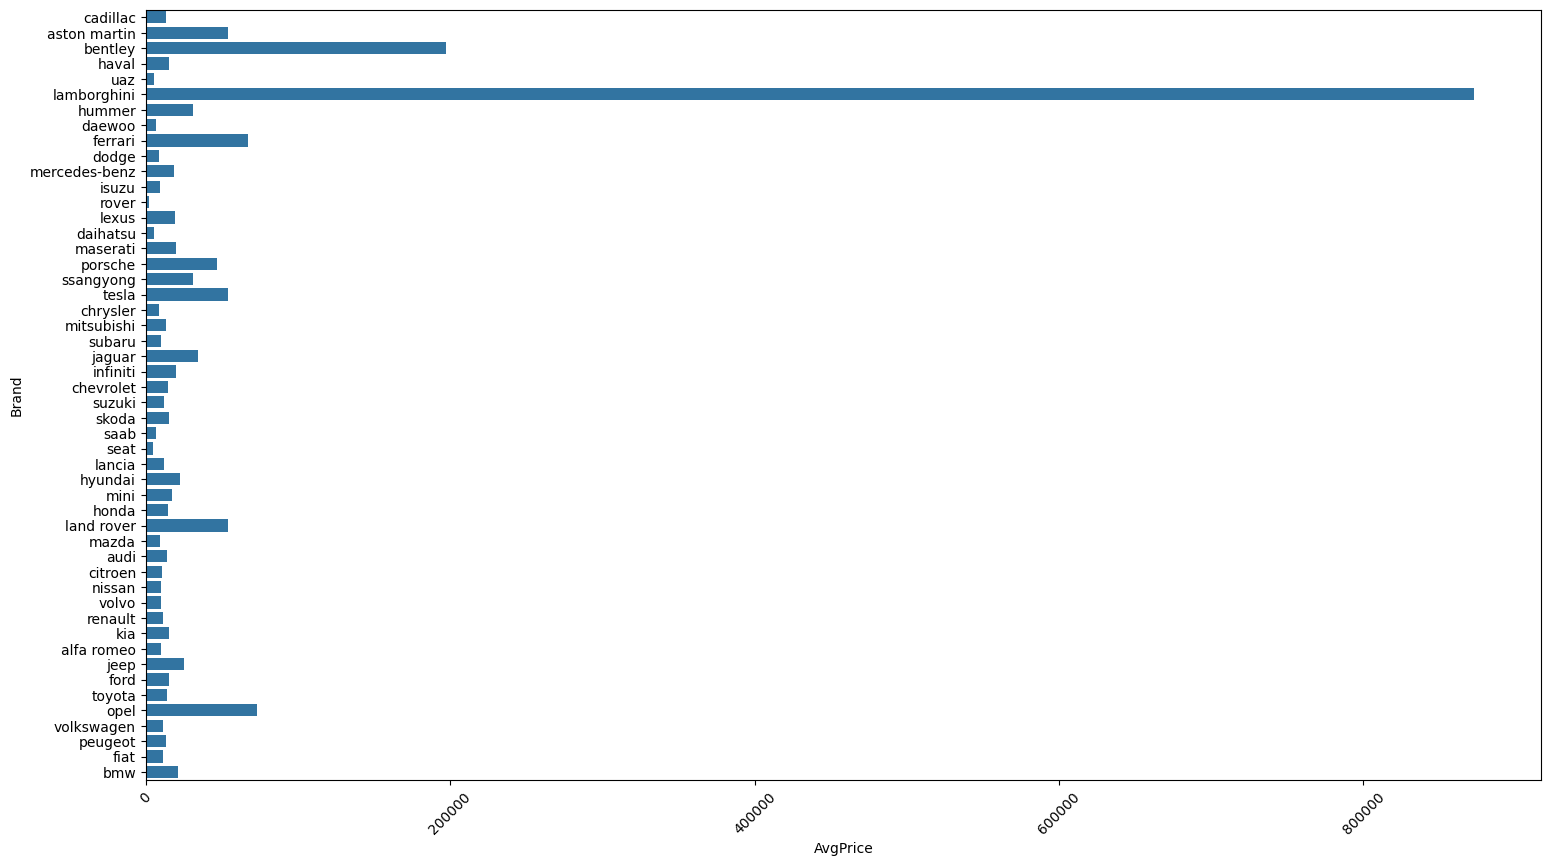

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.barplot(x='AvgPrice', y='Brand', data=avgPricePerBrand)
plt.xticks(rotation=45)
plt.show()

In [9]:
df["AVG_PRICE"] = df["VEHICLE_BRAND"].apply(lambda x: average_price_by_manufacturer[x.lower()] if x in average_price_by_manufacturer else None)
df["RATIO"] = df.apply(lambda x: x["PREMIUM_AMOUNT_PAID"]/x["CLAIM_AMOUNT_PAID"], axis=1)

df = df.dropna(subset=["AVG_PRICE", "RATIO"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203578 entries, 0 to 237647
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CLAIM_ID             203578 non-null  int64  
 1   POLICYHOLDER_AGE     203578 non-null  int64  
 2   POLICYHOLDER_GENDER  203572 non-null  object 
 3   WARRANTY             203578 non-null  object 
 4   CLAIM_DATE           203578 non-null  object 
 5   CLAIM_REGION         202449 non-null  object 
 6   CLAIM_PROVINCE       197175 non-null  object 
 7   VEHICLE_BRAND        203578 non-null  object 
 8   VEHICLE_MODEL        203558 non-null  object 
 9   CLAIM_AMOUNT_PAID    203578 non-null  float64
 10  PREMIUM_AMOUNT_PAID  203578 non-null  float64
 11  AVG_PRICE            203578 non-null  float64
 12  RATIO                203578 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 21.7+ MB


<Figure size 1800x1000 with 0 Axes>

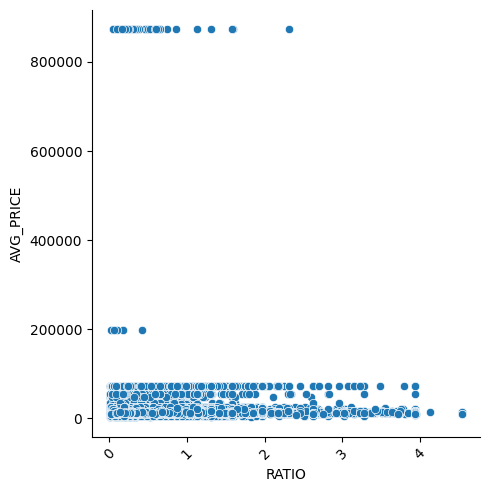

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.relplot(x='RATIO', y='AVG_PRICE', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
test = df["VEHICLE_MODEL"].unique()[1]

def levenstein_distance(word1, word2):
    m, n = len(word1), len(word2)
    
    matrix = np.zeros((m+1, n+1), dtype=int)
    
    matrix[:, 0] = np.arange(m+1)
    matrix[0, :] = np.arange(n+1)
    
    for i in range(1, m+1):
        for j in range(1, n+1):
            if word1[i-1] == word2[j-1]:
                substitution_cost = 0
            else:
                substitution_cost = 1

            matrix[i, j] = min(
                matrix[i-1, j] + 1,                # deletion
                matrix[i, j-1] + 1,                # insertion
                matrix[i-1, j-1] + substitution_cost    # substitution
            )
    
    similarity = 1 - matrix[m, n] / max(m, n)
    similarity_percentage = similarity * 100
    
    return similarity_percentage

np.float64(35.71428571428571)